In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
dfCsv = pd.read_csv("datas/bank/bank-full.csv")


#clean dataframe
df['default'] = dfCsv['default'].map({'yes':1 ,'no':0}) 
df['loan'] = dfCsv['loan'].map({'yes':1 ,'no':0}) 
df['Target'] = dfCsv['Target'].map({'yes':1 ,'no':0}) 
df['housing'] = dfCsv['housing'].map({'yes':1 ,'no':0})
df['marital'] = dfCsv['marital'].map({'single':0 ,'married':1,'divorced':2})
df['education'] = dfCsv['education'].map({'unknown':0 ,'primary':1,'secondary':2,'tertiary':3})
df['contact'] = dfCsv['contact'].map({'unknown':0 ,'cellular':1,'telephone':1})
df['poutcome'] = dfCsv['poutcome'].map({'unknown':0, 'success':1,'failure':2,'other':3})
df['month'] = dfCsv['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,'jul':7,'aug':8,'sep':9, 'oct':10,'nov':11,'dec':12})

dfCsv.drop(["job"], axis=1, inplace=True)

df

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,1,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,0,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,1,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,0,0,0,1,0,0,0,5,5,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,3,0,825,0,0,1,17,11,977,3,-1,0,0,1
45207,71,2,1,0,1729,0,0,1,17,11,456,2,-1,0,0,1
45208,72,1,2,0,5715,0,0,1,17,11,1127,5,184,3,1,1
45209,57,1,2,0,668,0,0,1,17,11,508,4,-1,0,0,0


In [3]:
df.dtypes
# df.isnull().sum()

age          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
Target       int64
dtype: object

In [4]:
df['month'].value_counts(dropna=False)


5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month, dtype: int64

In [5]:
# Importation du générateur de rapport de profile
from pandas_profiling import ProfileReport

In [6]:
# profile = ProfileReport(df)
# profile.to_file('bank-full-report.html')

In [110]:
#split data for the first model

dfClientData = df[['age','marital','education','default','balance','housing','loan','Target']]

# dfClientData

dfClientDataReadable = dfCsv[['age','marital','education','default','balance','housing','loan','Target']]
# dfClientDataReadable["Target"].value_counts()

count = dfClientDataReadable["Target"].value_counts()
countNo = count['no']
countYes = count['yes']

dfTargetNo = dfClientDataReadable.loc[(dfClientDataReadable['Target'] == 'no')].sample(n = countYes, random_state = 23)
dfTargetYes = dfClientDataReadable.loc[(dfClientDataReadable['Target'] == 'yes')]
dfClientDataReadable = pd.concat([dfTargetNo, dfTargetYes])
dfClientDataReadable
# dfTargetNo['Target'].value_counts()

,age,marital,education,default,balance,housing,loan,Target
22694,49,married,secondary,no,635,no,no,no
27386,39,married,secondary,no,13578,yes,no,no
1507,44,single,secondary,no,365,yes,no,no
29222,36,married,secondary,no,608,yes,no,no
35067,28,married,tertiary,no,417,yes,yes,no
...,...,...,...,...,...,...,...,...
45204,73,married,secondary,no,2850,no,no,yes
45205,25,single,secondary,no,505,no,yes,yes
45206,51,married,tertiary,no,825,no,no,yes
45207,71,divorced,primary,no,1729,no,no,yes


In [97]:
# dfClientData["Target"].value_counts()

# dfClientDataDelTargetZeroVal = dfClientData.Target
# dfClientDataDelTargetZeroVal

In [111]:
#split data for the second model

dfBankCampaignData = df[['contact','day','month','duration','campaign','pdays','previous','poutcome','Target']]
dfBankCampaignData

,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,0,5,5,261,1,-1,0,0,0
1,0,5,5,151,1,-1,0,0,0
2,0,5,5,76,1,-1,0,0,0
3,0,5,5,92,1,-1,0,0,0
4,0,5,5,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,1,17,11,977,3,-1,0,0,1
45207,1,17,11,456,2,-1,0,0,1
45208,1,17,11,1127,5,184,3,1,1
45209,1,17,11,508,4,-1,0,0,0


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# First model

In [113]:
y = dfClientData.Target
x = dfClientData.drop(['Target'], axis = 1)

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state = 42)

In [114]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 23, max_features = 2)

In [115]:
rf.fit(X=x_train, y=y_train)

RandomForestClassifier(max_features=2, random_state=23)

In [116]:
#Chaque colonne elle prend en compte à 8% Pclass, 25% le Sex etc, ainsi c'est l'importance des données en entrer 
pd.DataFrame(rf.feature_importances_*100,x_train.columns, columns=['Importance en %'])



,Importance en %
age,24.535051
marital,1.647739
education,2.447888
default,0.214985
balance,68.211546
housing,2.140324
loan,0.802467


In [117]:
# import shap

# shpv = shap.TreeExplainer(rf).shap_values(x_train)
# shap.summary_plot(shpv, x_train)
import plotly.express as px

def histogram(df, x, y):
    fig = px.histogram(df, x=x,y=y)
    fig.show()
    
def pieChart(df, values, names):
    fig = px.pie(df, values=x,names=y)
    fig.show()

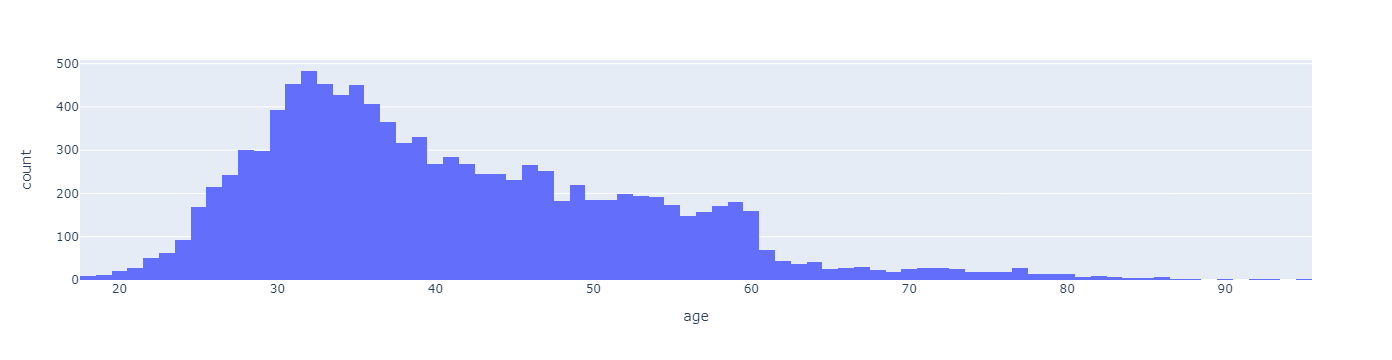

In [118]:
fig = px.histogram(dfClientDataReadable.age, x='age')
fig.show()

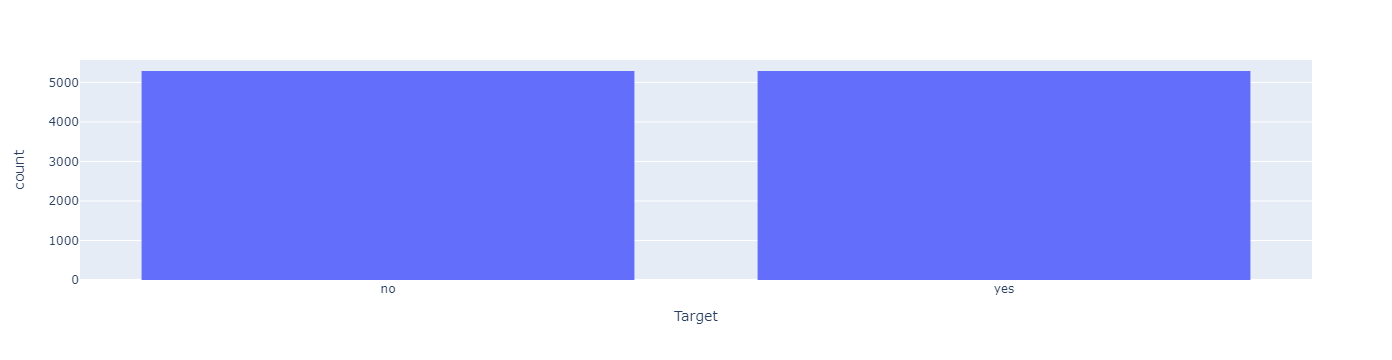

In [119]:
fig = px.histogram(dfClientDataReadable.Target, x='Target')
fig.show()

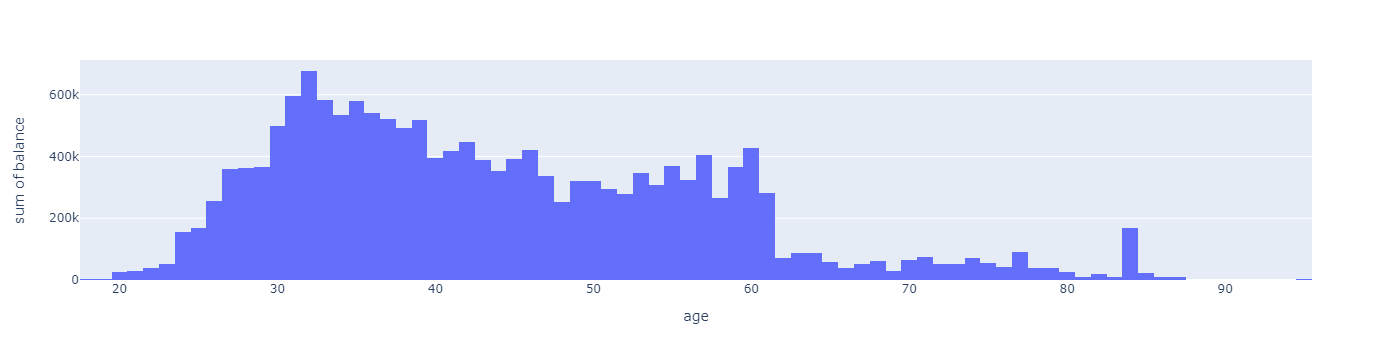

In [120]:
histogram(dfClientDataReadable,"age","balance")


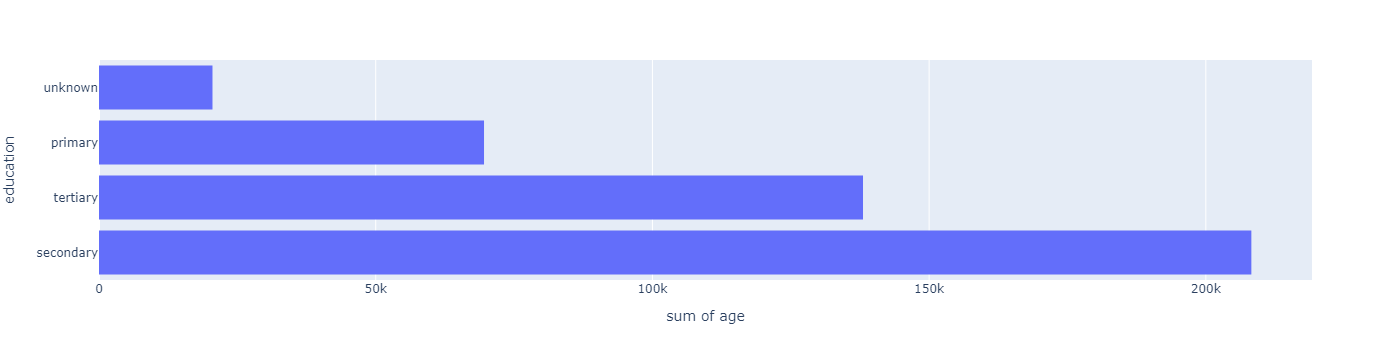

In [121]:
histogram(dfClientDataReadable,"age","education")

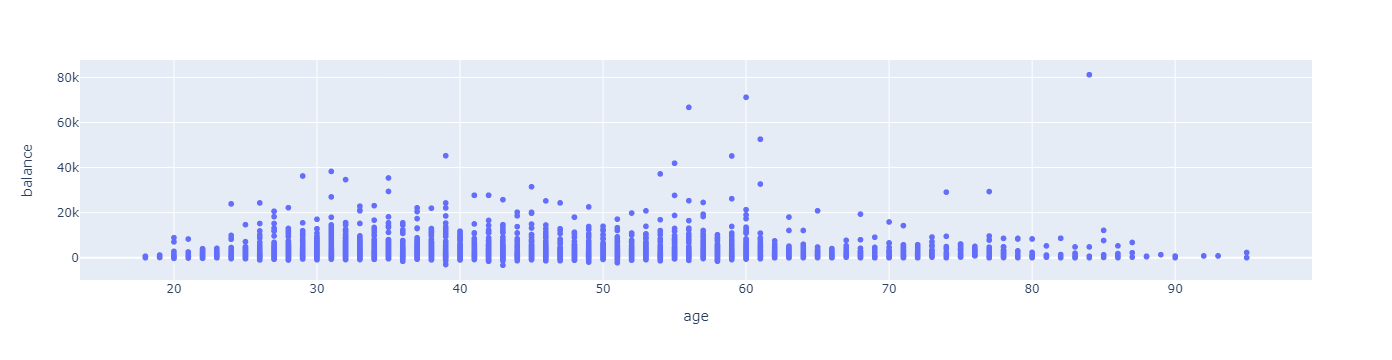

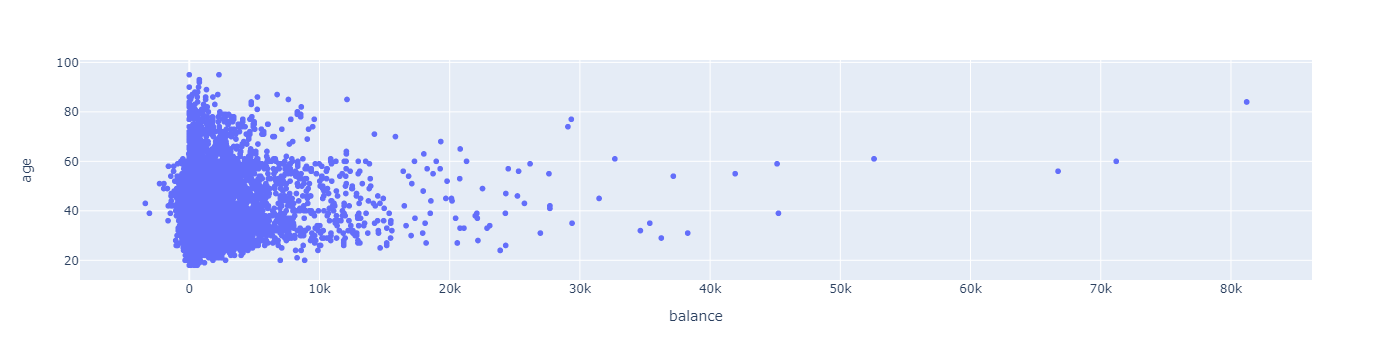

In [122]:
fig = px.scatter(dfClientDataReadable, x="age", y="balance")
fig.show()
fig = px.scatter(dfClientDataReadable, x="balance", y="age")
fig.show()

In [123]:
def print_score(learn_obj, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
	print("Score train : ", learn_obj.score(x_train, y_train,)*100, "%")
	print("Score test : ", learn_obj.score(x_test, y_test,)*100, "%")
print_score(rf)

Score train :  98.42402123424021 %
Score test :  86.51996019020237 %


# Second model

In [28]:
rf1 = RandomForestClassifier(n_estimators = 100, random_state = 23, max_features = 2)

In [29]:
rf1.fit(X=x_train, y=y_train)

RandomForestClassifier(max_features=2, random_state=23)

In [30]:
#Chaque colonne elle prend en compte à 8% Pclass, 25% le Sex etc, ainsi c'est l'importance des données en entrer 
pd.DataFrame(rf.feature_importances_*100,x_train.columns, columns=['Importance en %'])

,Importance en %
contact,1.641800
day,17.363307
month,11.955046
duration,47.466588
campaign,5.536654
pdays,7.168343
previous,3.094211
poutcome,5.774052


In [31]:
print_score(rf1)

Score train :  99.84793187347933 %
Score test :  90.02543403737697 %


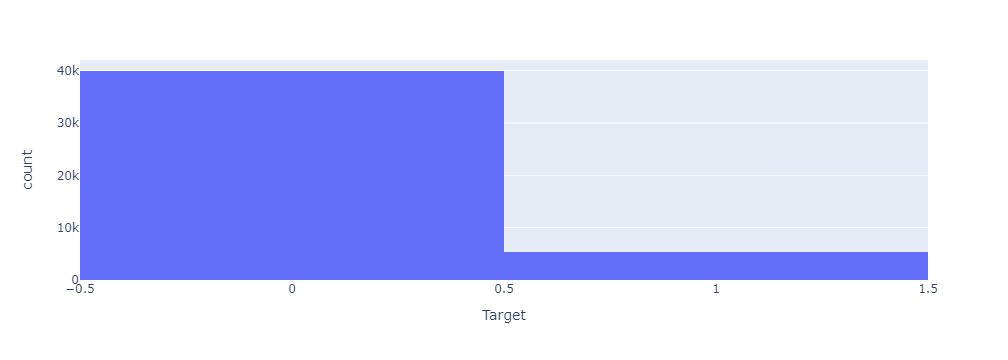

In [20]:
fig = px.histogram(dfBankCampaignData.Target, x='Target')
fig.show()